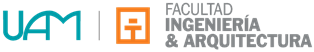

# Examen: Generación de resúmenes y reportes

**Nombre: Franya Dalila Gutierrez Lopez**

## 📘 Consulta asignada

### 5\. Mostrar el número de órdenes y el total vendido a cada cliente del Reino Unido, agrupando por cliente.

## 📘 **Explicación del Proceso**

- Se seleccionan las columnas que desean ser mostradas:
    
    - _c.CustomerID_ = el ID del cliente, también se le asigna un alias, en este caso ese alias es: _ID_. Esto para que la impresión sea más intuitiva para la lectura, y de igual forma para que cuando vaya a usar esos datos, simplemente llame a esa _variable_
    - _c.CompanyName_ = el nombre del cliente cuyo alias (asignado por AS) _Cliente_
    - **COUNT(o.OrderID)=** como se solicita mostrar la cantidad de datos vendidos, se cuenta cuantos datos hay en la tabla de Orders usando su ID, para así contemplar TODOS los datos ingresados en esa tabla. COUNT cuenta todos los registros que hay en dicha tabla. A esta función se le asigna la variable de _NumeroDeOrdenes_
    - _SUM(od.Quantity\*od.UnitPrice-od.Discount)_ = Función explicada:
        - La cantidad de productos comprados en una orden de OrderDetails \* El precio unitario de ese producto comprado en la orden de OrderDetails
        - A la multiplicación anterior, se le resta el descuento designado a esa orden, que se encuentra en la tabla de OrderDetails.
        - Todo esto, se suma con cada uno de los datos que haya de esa empresa (luego se agrupan en la consulta de la linea 6
        - A esto se le asigna la variable TotalVendido
    - Esas son los campos que se estarán mostrando en la tabla
- Se selecciona el origen de los datos, en este caso los datos provienen de la tabla de Customers, pues es ahí donde están ubicados los datos de los clientes. Se le asigna la variable **c**. Por ello, en las consultas anterioresm no se ponia el nombre completo de la tabla, sino simplemente: **_c_**
    
- Se unen las tablas con sus claves. Aquí, la tabla Customers s<span style="color: var(--vscode-foreground);">e une con la tabla Orders.</span> <span style="color: var(--vscode-foreground);">&nbsp;La unión se realiza a través del campo CustomerID, qu</span><span style="color: var(--vscode-foreground);">e es común en ambas tablas.&nbsp;</span> 
    
- <span style="color: var(--vscode-foreground);">De la misma forma anterior, se unen las claves de Order Details (entre corchetes porque hay un espacio), la llave foranea de OrderID, se une a la tabla de Orders (su clave primaria) OrderID.</span>
    
- <span style="color: var(--vscode-foreground);">Se agrupan las con GRUOP BY todas las operaciones a realizar a los campos de customerID y CompanyName.&nbsp;</span> 
    
- <span style="color: var(--vscode-foreground);">Se ordena la vista por TotalVendido, en orden descendente (de mayor a menor)</span>

In [24]:
SELECT c.CustomerID AS ID, c.CompanyName AS Cliente, COUNT(o.OrderID) AS NumeroDeOrdenes, SUM(od.Quantity*od.UnitPrice*(1-od.Discount)) AS TotalVendido
FROM Customers AS c
INNER JOIN Orders AS o ON c.CustomerID = o.CustomerID
INNER JOIN [Order Details] AS od ON o.OrderID = od.OrderID
WHERE c.Country IN('UK')
GROUP BY c.CustomerID, c.CompanyName
ORDER BY TotalVendido DESC

(7 rows affected)

Total execution time: 00:00:00.010

ID,Cliente,NumeroDeOrdenes,TotalVendido
SEVES,Seven Seas Imports,26,16215.325061798096
EASTC,Eastern Connection,21,14761.03500366211
AROUT,Around the Horn,30,13390.650009155273
ISLAT,Island Trading,23,6146.299995422363
BSBEV,B's Beverages,22,6089.899990081787
CONSH,Consolidated Holdings,7,1719.1000032424927
NORTS,North/South,6,649


## **<span style="font-size: 14px; color: var(--vscode-foreground);">📘</span> Interpretación de los Resultados**

- Los resultados muestran que la compañía: **Seven Seas Imports**_,_ identificada con el ID **SEVES**_,_ es a quien más dinero se le ha facturado. Con un total de 16215.325061798096,
- Eastern Connection ha hecho 21 ordenes con un total de 14761.03500366211
- La compañía que más facturas tiene, quienes más ordenes han hecho, son **Around the Horn.** Con un total de 30 ordenes, y a su veez 14761.03500366211 en dinero
- La compañía que menos ordenes tiene es **North/South,** identificada con el ID **NORTS,** con un total de 6 ordenes y 629 de dinero.

## **📘 Especificación detallada de consultas usadas**

> Para saber cómo salia especificado **Reino Unido** <span style="font-size: 14px; color: var(--vscode-foreground);">en la tabla, se imprimieron todos los campos de </span> **Customers.** <span style="font-size: 14px; color: var(--vscode-foreground);">Ahí, se verificó que salia como </span> _UK_<span style="font-size: 14px; color: var(--vscode-foreground);">.Para saber cuantos clientes eran del Reino Unido, se usó la siguiente consulta</span>

In [ ]:
SELECT *
FROM Customers AS c
WHERE c.Country IN('UK') --Where c.Country='UK'

> Con respecto a la tabla de orders, no se realizo ninguna consulta para conocer sus campos, pues al momento de digitarla en el codigo se vio que existian los IDs que se iban a usar: _CustomerID_ y _OrderID_

> Para verificar los datos que se iban a unir a la tabla de clientes se hizo la siguiente consulta. Pues así se confirmó si el dato del descuento estaba en porcentaje o en dinero. Y también se corroboraron los datos que se iban a usar.

In [ ]:
select *
from [Order Details]